# Project 5: 

The advective equation otherwise known as the convection equation is a partial differential equation (PDE) that describes the motion of a fluid or a scalar field due to advection. Advection is the transport of a property (such as mass, momentum, or energy) by a fluid or a scalar field. We would typically see it in the form 

$$
\frac{\partial u}{\partial t}=-v\frac{\partial u}{\partial x},
$$

where $u=u(x,t)$, and $v$ is the so-called "velocity" of the advection. This linear first-order hyperbolic partial differential equation is one that is commonly used when studying oceanic dynamics, geophysics, atmospheric chemistry and more. We will seek to find the solution to this equation given some initial conditions.

Numerically, we will use Gaussian initial conditions $$u(x,0)=u_{0}e^{-\frac{(x-x_{0})}{w^{2}}}$$ where $x$ is the position and $w$ is the width of the advection. Set the intial amplitude of the pulse to be $u_{0}=1$, the initial position $x_{0}=0.5$, the width $w=1$, and the velocity $v=10$. Set the step size of the position grid be $\Delta x=0.01$ and the time grid to be $\Delta t=0.0001$ and the number of steps for the position and time respectively to be $N_{x}=1000$ and $N_{t}=1000$. Lastly, solve this over a position grid encompassing $-(1/2)N_{x}\Delta x\leq x \leq (1/2)N_{x}\Delta x$ and time grid encompassing $0\leq t\leq N_{t}\Delta t$.

1. The exact solution to this PDE is $$u_{\text{exact}}(x,t) = u_{0}e^{-\frac{(x-vt-x_{0})^{2}}{w^{2}}},$$ 
    1. Plot the contour of the solution.
    2. Plot the trace of the solution at the final time and save the result for easy comparison.
    
2. Discretize the PDE.
    1. Write the matrix form.
    2. Write a function that solves this system given the parameter space.
    3. Plot the contour of the solution.
    4. Plot the trace of the solution at the final time and save the result.

### Solutions:

We import the relevant packages for this task

In [88]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-notebook')

We allocate an array to store the final time

In [89]:
final = []

We were given a parameter space to use, so we start the calculation by defining these and building the relevant grids over which we will evaluate the initial conditions. 

In [90]:
dx = 0.01   # x step
dt = 0.0001 # t step
Nx = 1000   # x points
Nt = 1000     # t points

u0 = 1      # Initial amplitude
v = 10      # Advection velocity
x0 = 0.5    # Initial position
w = 1     # Width

x_grid = np.linspace(-dx*Nx/2, dx*Nx/2, Nx) # x grid
ic = u0*np.exp(-(x_grid-x0)**2/w**2)        # Initial Gaussian packet

1. Given the exact solution and parameters, we simply need to construct a two dimensional grid and map the function onto it.

In [91]:
t_grid = np.linspace(0, Nt*dt, Nt)
X, T = np.meshgrid(x_grid, t_grid) # x and t meshgrid
solution_analytical = u0*np.exp(-(X-v*T-x0)**2/(w**2)).T # Apply meshgrid to real solution

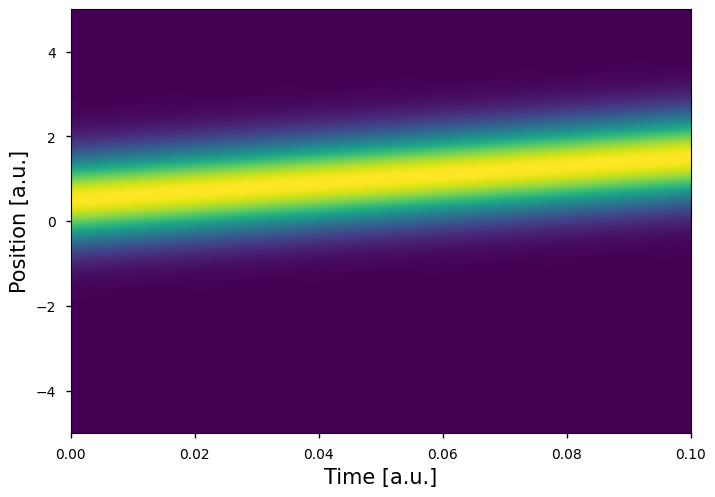

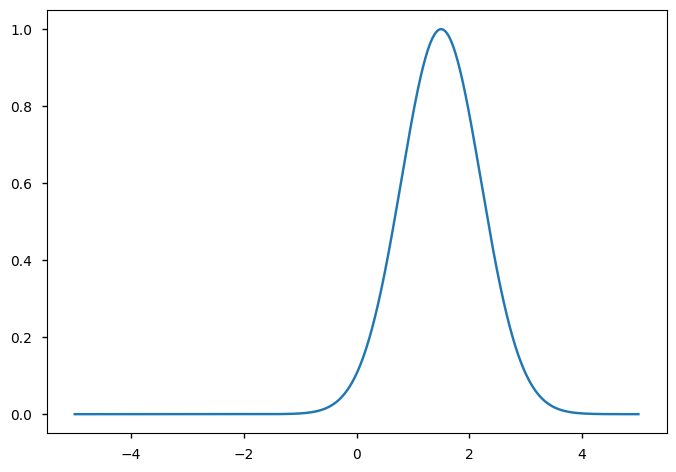

In [92]:
plt.imshow(solution_analytical, aspect='auto', origin='lower', extent=[0, Nt*dt, x_grid[0], x_grid[-1]]) # Visualize
plt.xlabel('Time [a.u.]', fontsize=15)
plt.ylabel('Position [a.u.]', fontsize=15)
plt.show()

final.append(solution_analytical[:,-1])

plt.plot(x_grid, solution_analytical[:,-1])
plt.show()

2. There are many methods by which a PDE can be solved, and choosing the method is done on a case-by-case basis. With the advective equation, this linear first-order equation can be naively solved by dicretization only. We will enumerate the steps to being able to construct a matrix of values out of the discretized PDE.

Starting with the equation

$$
\frac{\partial u}{\partial t}=-v\frac{\partial u}{\partial x},
$$

we wish to approximate the left-hand-side and right-hand-side derivatives. Relative to the physical quantities representing position $x$ and time $t$, we need to choose a differentiation scheme that satisfies their limits. We have access to forwards-, central, and backwards derivatives. In space, we allow for negative and positive position, so the logical choice is a central difference scheme, whereas time relative to our starting point at $t=0$ is strictly positive, thus a foward-differencing scheme makes more sense. These take the form

$$
\begin{align}
\frac{\partial u}{\partial x}&=&\frac{u_{i+1}^{j}-u_{i-1}^{j}}{2\Delta x},\nonumber\\
\frac{\partial u}{\partial t}&=&\frac{u_{i}^{j+1}-u_{i}^{j}}{\Delta t},\nonumber
\end{align}
$$

The notation associated with $u(x,t)$ denotes the position index $i$ and time index $j$ along some grid with a position and time spacing respectively given by $\Delta x$ and $\Delta t$. The discretized spacial grid then becomes $x_{i}=x_{0}+i\Delta x$ and the time grid is $t_{j}=t_{0}+j\Delta t$. The result of the calculation is sensitive to the choice of $\Delta x$ and $\Delta t$ such that values either too big or too small could cause numerical instability. If the spatial grid is well defined, we can calculate the stepsize $\Delta x = \left(x_{\text{max}}-x_{\text{min}}\right)/(N_{x}+1)$.

Plugging the derivatives back into the advective equation gives

$$
\frac{u_{i}^{j+1}-u_{i}^{j}}{\Delta t}=-v\left(\frac{u_{i+1}^{j}-u_{i-1}^{j}}{2\Delta x}\right)
$$

according to the initial conditions, we have all the information about our position index at $i$, $i+1$, $i-1$ at a particular time index $j$. Notice that the equation then has technically only one unknown $u^{j+1}_{i}$. This is the next time step, which gives our forward time propogation. Solving for this unknown gives

$$
u_{i}^{j+1} = u_{i}^{j}-\frac{v\Delta t}{2\Delta x}\left(u_{i+1}^{j}-u_{i-1}^{j}\right)
$$

A interesting feature of this representation is that the indices $i$ and $j$ can effectively act as matrix coordinates. Let's explore a not-so-rigorous demonstration of this such that $\alpha = \frac{v\Delta t}{2\Delta x}$, then

$$
\begin{align}
i=0, j=0&:&u_{0}^{0}-\alpha u_{1}^{0}+\alpha u_{-1}^{0}\nonumber\\
i=1, j=0&:&u_{1}^{0}-\alpha u_{2}^{0}+\alpha u_{0}^{0}\nonumber\\
i=0, j=1&:&u_{0}^{1}-\alpha u_{1}^{1}+\alpha u_{-1}^{1}\nonumber\\
i=1, j=1&:&u_{1}^{1}-\alpha u_{2}^{1}+\alpha u_{0}^{1}\nonumber 
\end{align}
$$

We could convince ourselves that relative to the initial $i$ and $j$ coordinates, we could construct a $N_{t}\times N_{x}$ coefficient matrix given by

$$
\bm{a} = \begin{bmatrix}
1&-\alpha&0&\cdots&0&0\\
\alpha&1&-\alpha&\cdots&0&0\\
0&\alpha&1&\cdots&0&0\\
0&0&\alpha&\cdots&0&0\\
0&0&0&\cdots&-\alpha&0\\
0&0&0&\cdots&1&-\alpha\\
0&0&0&\cdots&\alpha&1\\
\end{bmatrix}
$$

which is multiplied by a $N_{x}\times 1$ initial condition vector $\bm{u}_{0}$, where the result is an updated initial guess for the following time step 

$$
\bm{u}^{j+1}_{0} = \bm{a}\cdot \bm{u}_{0}
$$

This is done until we satisfy the entire time range and at the end we have a $N_{x} \times N_{t}$ solution matrix for all time steps.

The solver is quite simple to make in this case, where we only require the coefficient matrix, the initial condition vector, and the number of points. This is shown below

In [93]:
def solve(matrix:np.array, initial_condition:np.array, points:list):
    """
    The solver for our discritized PDE

    Args:
        matrix (np.array): The coefficient matrix
        initial_condition (np.array): The initial condition vector
        points (list): A list of grid points

    Returns:
        np.array: A matrix of solutions
    """    
    x_points, y_points = points

    approximation = np.zeros((Nx, Nt))
    approximation[0, :] = initial_condition
    
    for j in range(1, Nt):
        initial_condition = np.dot(matrix, initial_condition)
        approximation[:,j] = initial_condition
    return approximation

Now using the descritized version of our PDE, we can construct the diagonal/ off-diagonal components of the coefficient matrix

In [94]:
a = (dt*v)/(2*dx) # Constants

A =   np.eye(Nx) +\
    a*np.diag(np.ones(Nx-1),-1) -\
    a*np.diag(np.ones(Nx-1), 1)

# A = diag +
#     lower off-diag-
#     upper off-diag

solution = solve(A, ic, [Nx, Nt]) # Call the solver

And we visualize

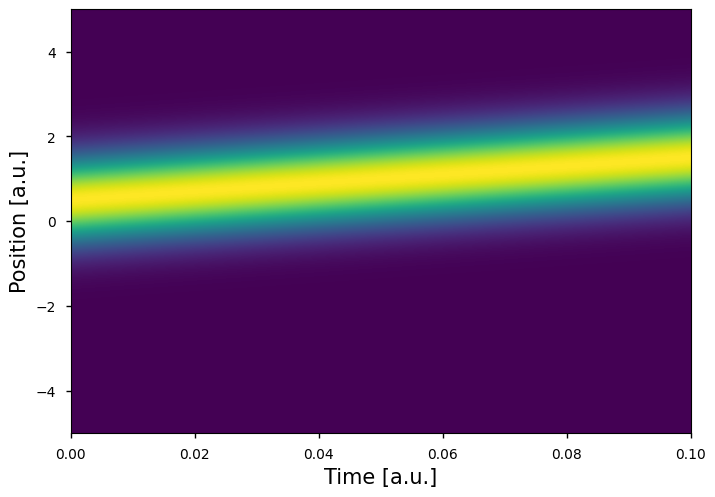

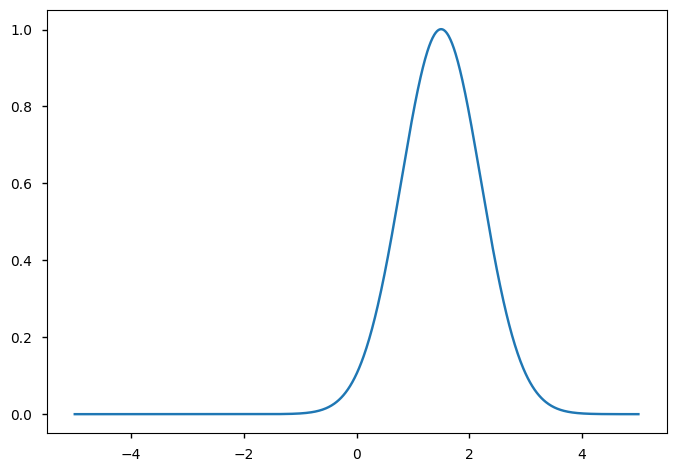

In [95]:
plt.imshow(solution, aspect='auto', origin='lower', extent=[0, Nt*dt, x_grid[0], x_grid[-1]])
plt.xlabel('Time [a.u.]', fontsize=15)
plt.ylabel('Position [a.u.]', fontsize=15)
plt.show()

final.append(solution[:,-1])

plt.plot(x_grid, solution[:,-1])
plt.show()

Comparing the exact solution to the calculated solution reveals very closely matching results and a low relative error.

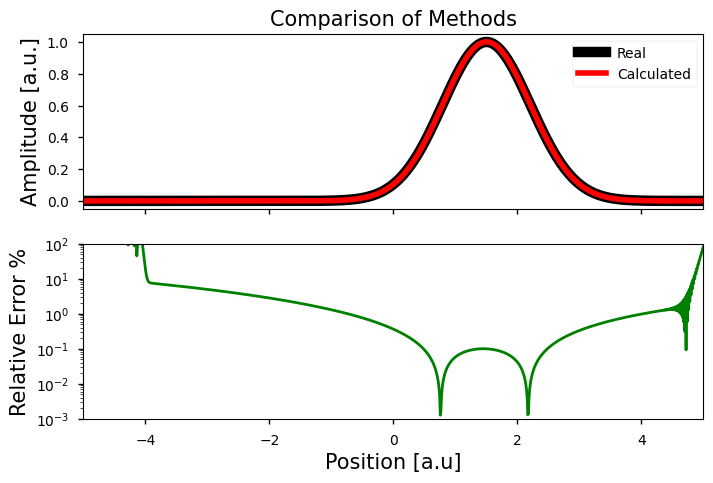

In [96]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,5), sharex=True)

linewidths = [7.5, 4]
colors = ['k', 'r']
labels = ['Real', 'Calculated']
for idx, graph in enumerate(final):
    ax[0].plot(x_grid, graph, linewidth = linewidths[idx], color=colors[idx], label=labels[idx])
    ax[idx].set_xlim([x_grid[0], x_grid[-1]])

ax[1].semilogy(x_grid, np.abs(final[1]-final[0])/final[0]*100, color = 'g', linewidth = 2)
ax[1].set_ylim([1e-3, 1e2])

ax[0].legend(loc='best')    
ax[1].set_xlabel('Position [a.u]', fontsize=15)
ax[0].set_ylabel('Amplitude [a.u.]', fontsize=15)
ax[1].set_ylabel('Relative Error %', fontsize=15)
ax[0].set_title('Comparison of Methods', fontsize=15)
plt.show()